# Count Daily Vehicles

- Read all .csv file from **input_dir** and save daily vehicle count  in **output_dir**
- Vehicle id is given by column: 'serial' or 'ap_id'

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

def count_vehicle_by_day2(csv, output_dir):
    
    print ("\n\nProcessing: ", csv)
    df = pd.read_csv(csv,usecols=['serial','tlm_datagettime'])
    df.rename(columns = {'serial':'ap_id','tlm_datagettime':'timestamp'}, inplace = True)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df=df.sort_values(by=['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df_daily=df.groupby('date').agg(['count']).reset_index()
    print ("Total Days: ", len(df_daily) )
    display(df_daily.head())
    
    df_daily.plot(x='date', y='ap_id',kind="bar")
    plt.xlabel('date')
    plt.ylabel('Vehicle Count')
    plt.show()
    
    op_file = output_dir + '/' + Path(csv).name
    df_daily.to_csv(op_file.replace('.csv', '_dailyvehicle.csv') , index = False)
    
    return
    

In [3]:


input_dir = "new_data"
output_dir = "new_data/output"
Path(output_dir).mkdir(parents=True, exist_ok=True)

import glob, os

for csv_file in glob.glob("new_data/*.csv"):
    print(csv_file)
    #count_vehicle_by_day2(csv_file, output_dir)

new_data/gpsdata1901-1912.csv
new_data/gpsdata_201803-12.csv
new_data/gpsdata_202001-03.csv


new_data/gpsdata1901-1912.csv


Processing:  new_data/gpsdata1901-1912.csv
Total Days:  364


,date,ap_id,timestamp
,,count,count
0,2019-01-01,1089,1089
1,2019-01-02,838,838
2,2019-01-03,663,663
3,2019-01-04,626,626
4,2019-01-05,762,762


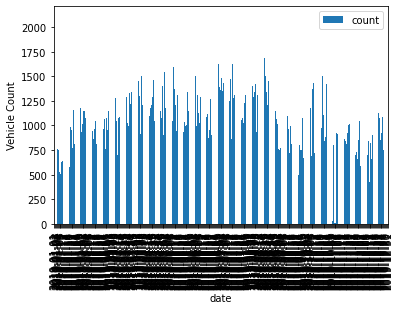

new_data/gpsdata_201803-12.csv


Processing:  new_data/gpsdata_201803-12.csv
Total Days:  274


,date,ap_id,timestamp
,,count,count
0,2018-04-01,622,622
1,2018-04-02,661,661
2,2018-04-03,458,458
3,2018-04-04,1033,1033
4,2018-04-05,861,861


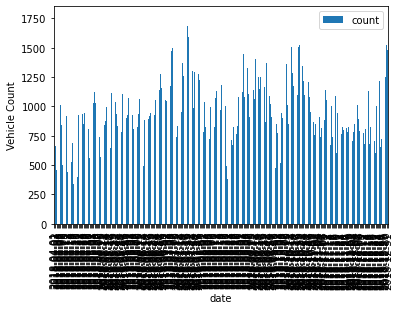

new_data/gpsdata_202001-03.csv


Processing:  new_data/gpsdata_202001-03.csv
Total Days:  91


,date,ap_id,timestamp
,,count,count
0,2020-01-01,793,793
1,2020-01-02,742,742
2,2020-01-03,635,635
3,2020-01-04,498,498
4,2020-01-05,464,464


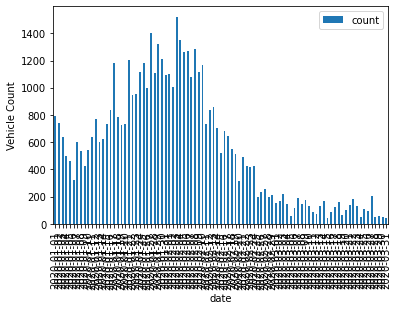

In [4]:
for csv_file in glob.glob("new_data/*.csv"):
    count_vehicle_by_day2(csv_file, output_dir)